In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [3]:
res = requests.get('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/refs/heads/main/day31-power-transformer/concrete_data.csv').text
df = pd.read_csv(StringIO(res))
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:8], df.iloc[:,[-1]], test_size=0.2, random_state=42)

In [36]:
import scipy.stats as stats
import seaborn as sns

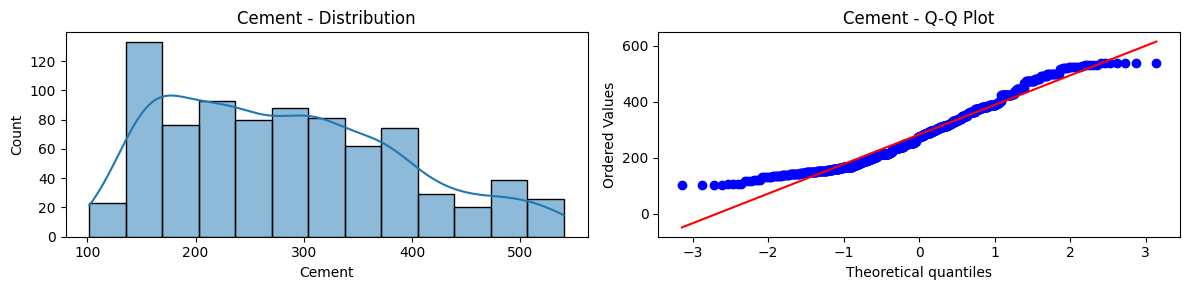

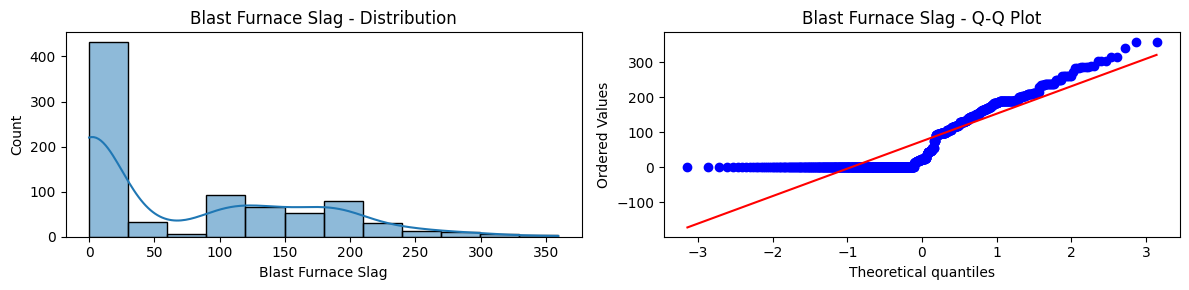

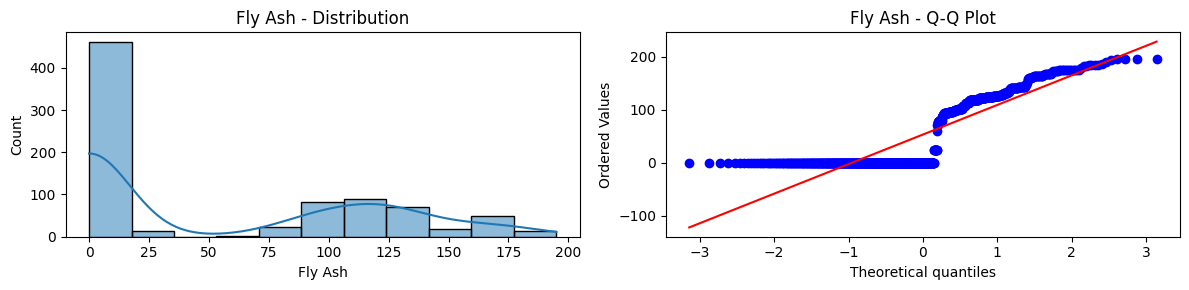

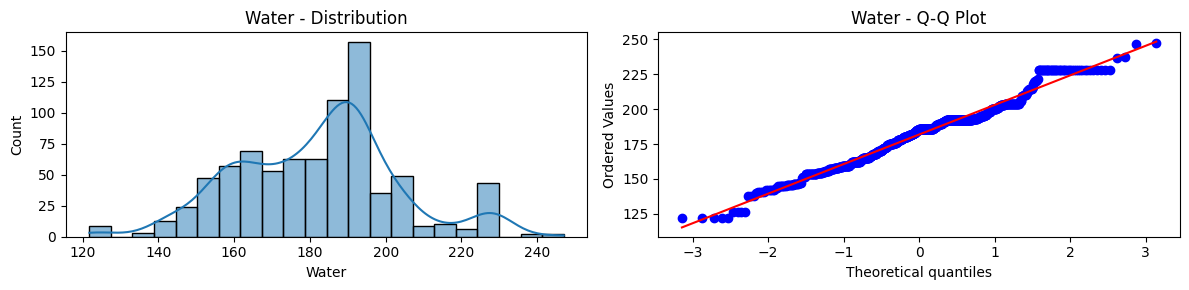

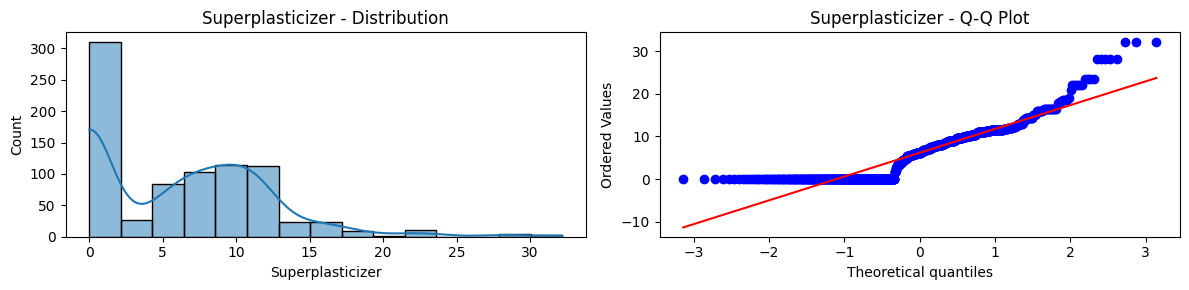

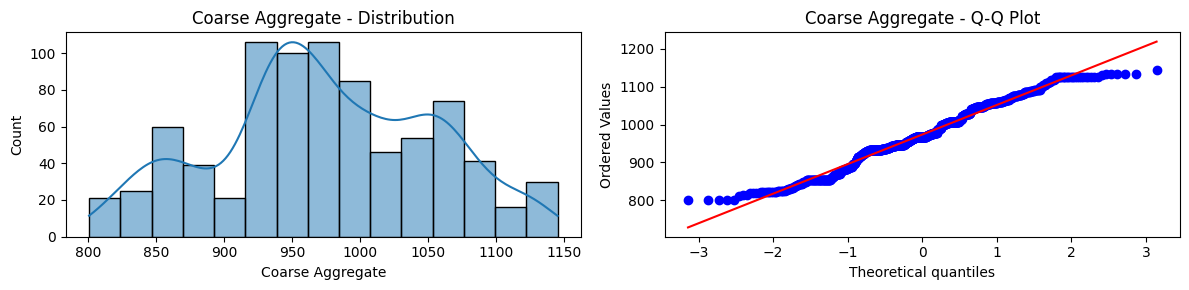

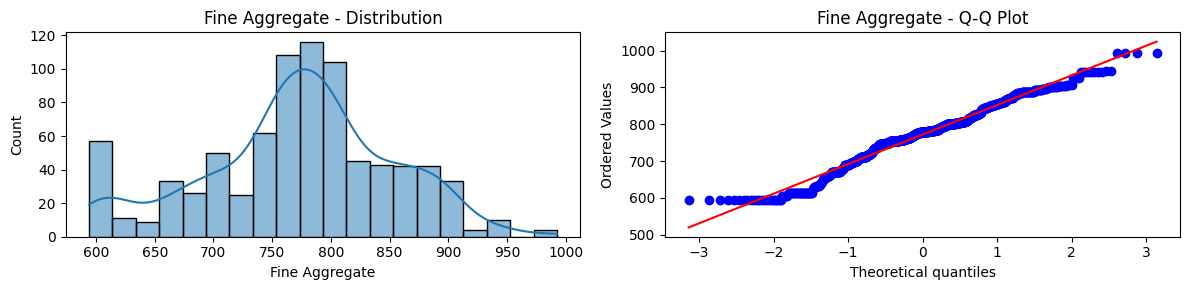

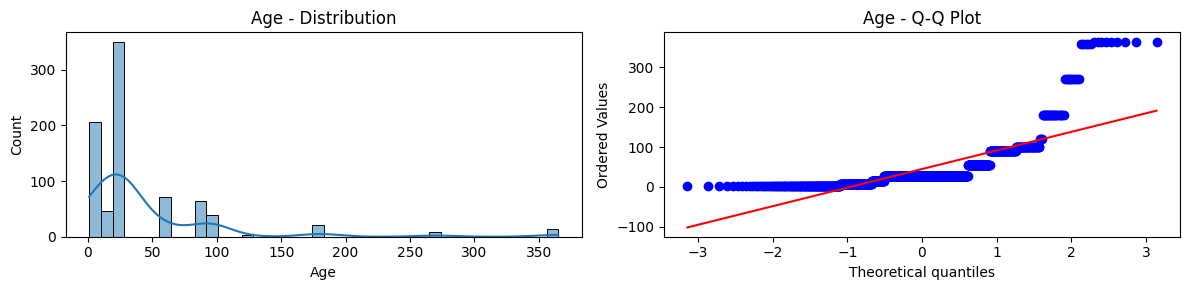

In [37]:
for col in x_train.columns:
    plt.figure(figsize=(12, 3))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(x_train[col], kde=True)
    plt.title(f'{col} - Distribution')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(x_train[col], dist='norm', plot=plt)
    plt.title(f'{col} - Q-Q Plot')

    plt.tight_layout()
    plt.show()


In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print('r2score =',r2_score(y_pred, y_test))
np.mean(cross_val_score(lr, df.iloc[:,:8], df.iloc[:,[-1]], scoring='r2'))

r2score = 0.4231704797890976


np.float64(0.46099404916628606)

In [52]:
from sklearn.preprocessing import PowerTransformer
ptr = PowerTransformer('box-cox')

x_train_transformed = ptr.fit_transform(x_train + 1)
x_test_transformed = ptr.fit_transform(x_test + 1)


In [55]:
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
y_pred = lr.predict(x_test_transformed)
print('r2score =',r2_score(y_pred, y_test))
np.mean(cross_val_score(lr, x_train_transformed, y_train, scoring='r2'))

r2score = 0.7912736982008014


np.float64(0.794178217776105)

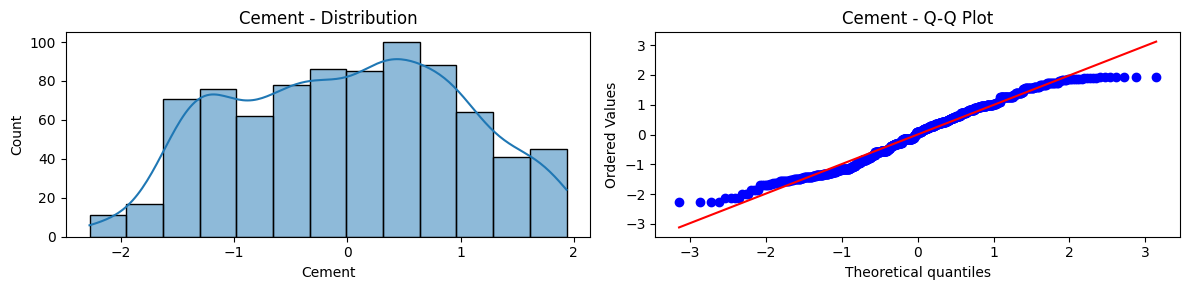

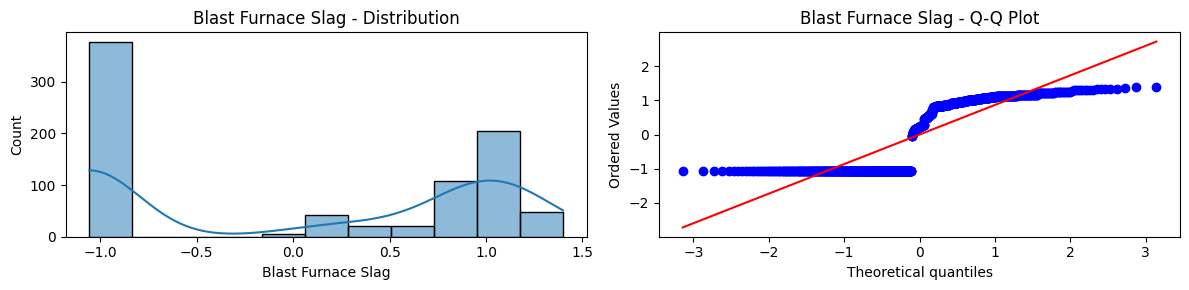

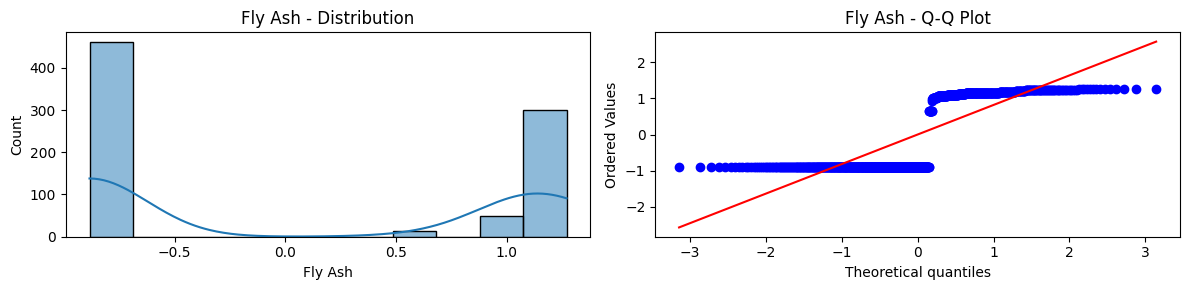

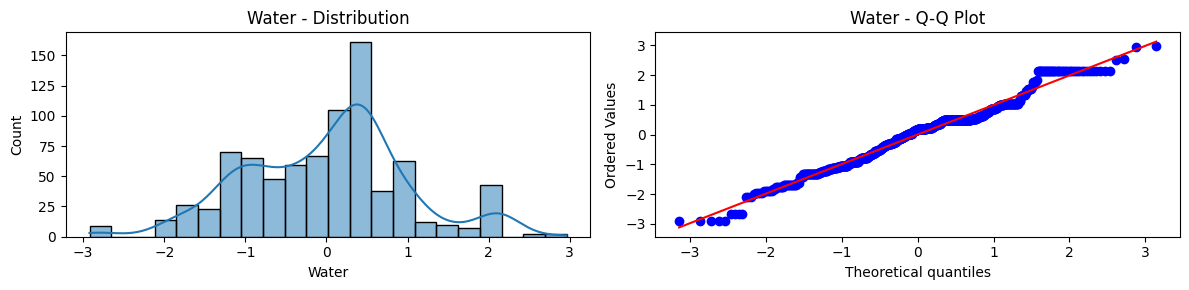

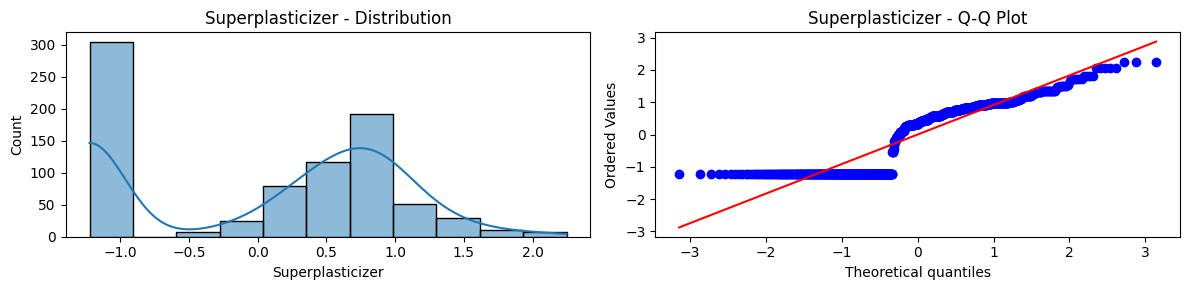

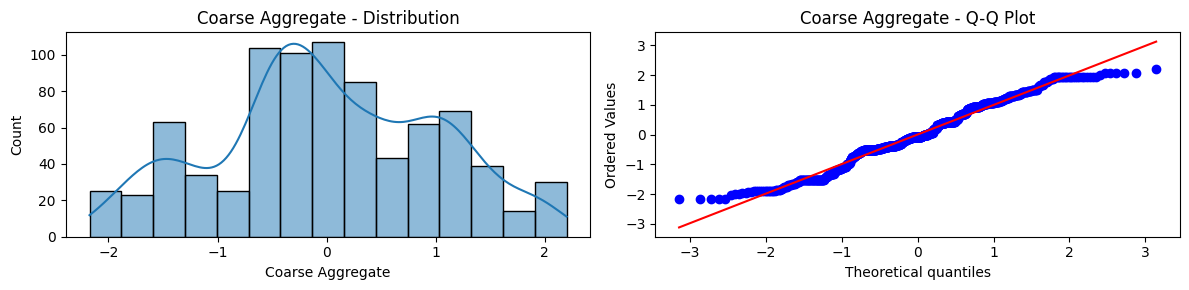

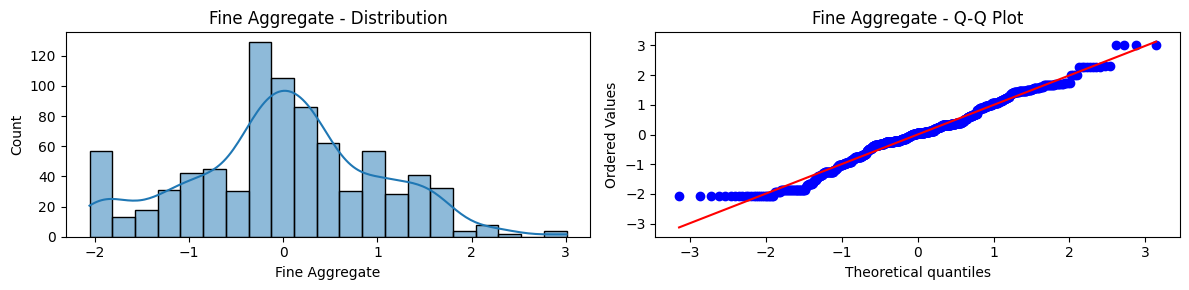

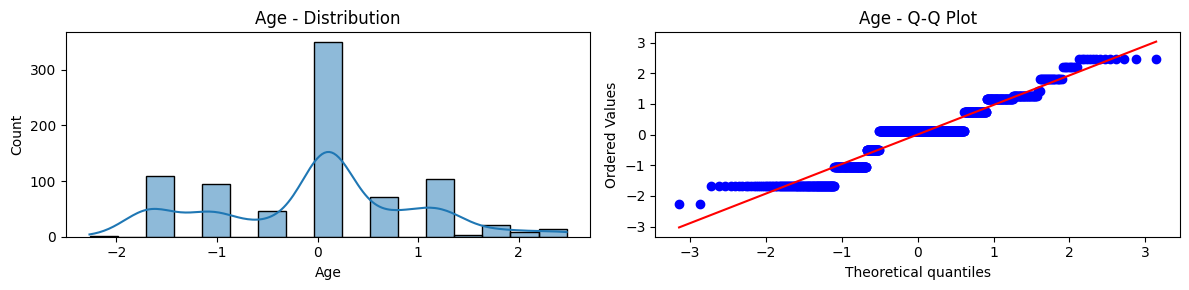

In [57]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
for col in x_train_transformed.columns:
    plt.figure(figsize=(12, 3))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_transformed[col], kde=True)
    plt.title(f'{col} - Distribution')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(x_train_transformed[col], dist='norm', plot=plt)
    plt.title(f'{col} - Q-Q Plot')

    plt.tight_layout()
    plt.show()


In [61]:
## YEO JOHNSON
ptr = PowerTransformer()

x_train_transformed = ptr.fit_transform(x_train + 1)
x_test_transformed = ptr.fit_transform(x_test + 1)
ptr.lambdas_


array([ 0.21044984,  0.00250461, -0.04933164,  0.95880996,  0.27247953,
        1.19300999,  1.97638853, -0.10568974])

In [59]:
lr = LinearRegression()
lr.fit(x_train_transformed, y_train)
y_pred = lr.predict(x_test_transformed)
print('r2score =',r2_score(y_pred, y_test))
np.mean(cross_val_score(lr, x_train_transformed, y_train, scoring='r2'))

r2score = 0.7937406615117379


np.float64(0.795385319629225)

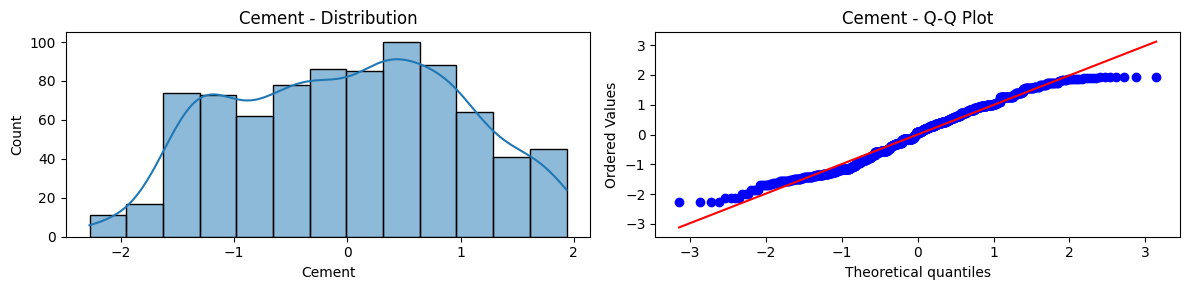

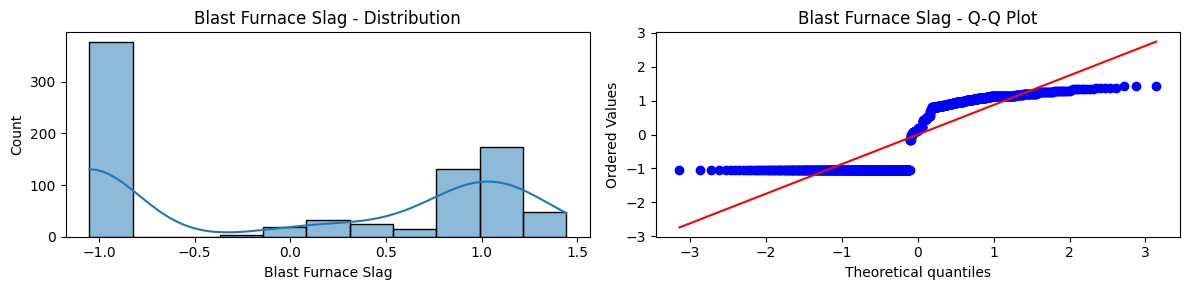

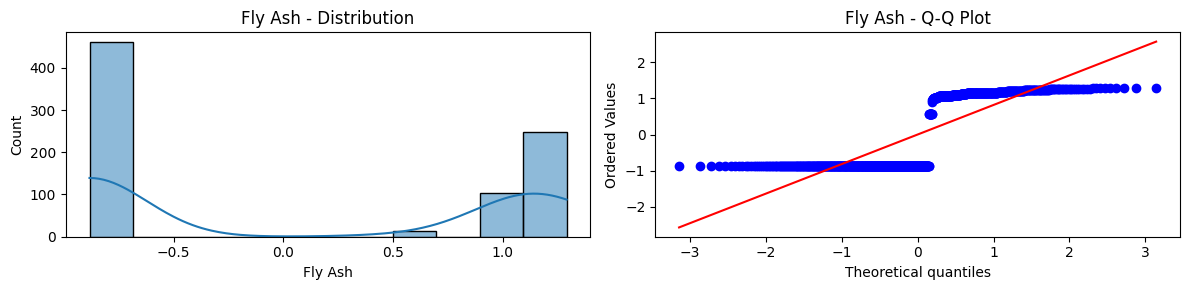

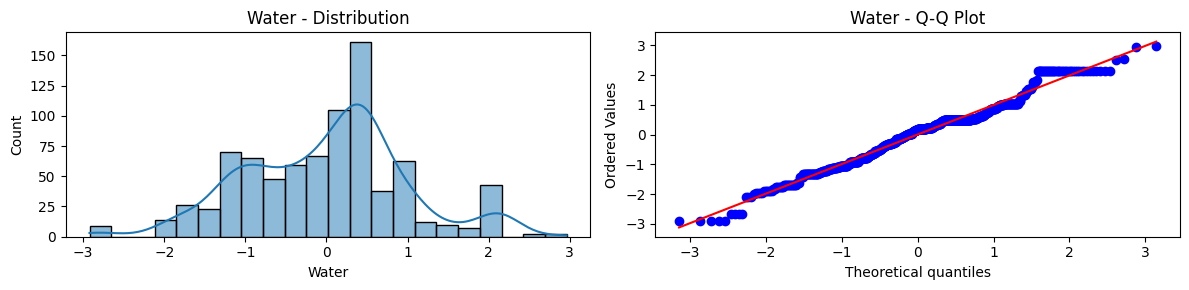

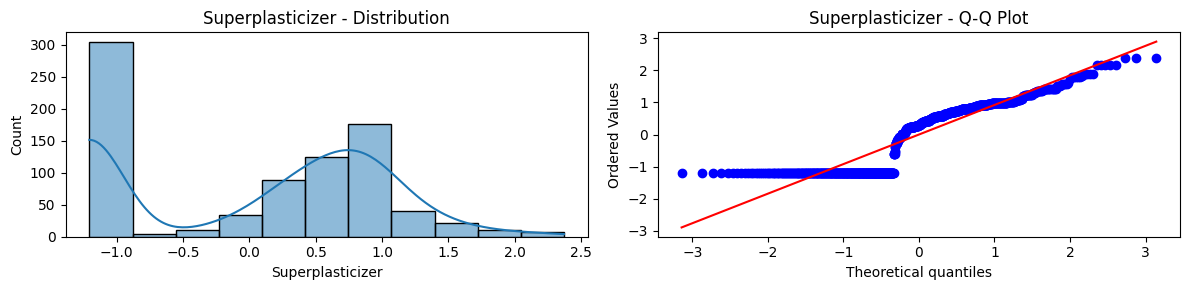

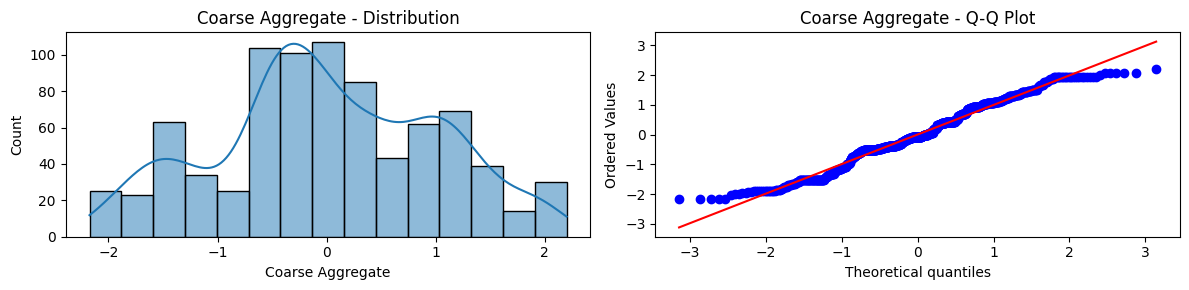

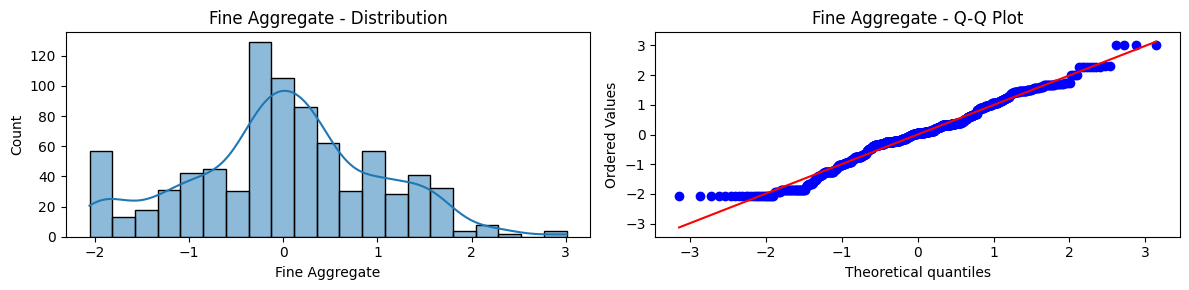

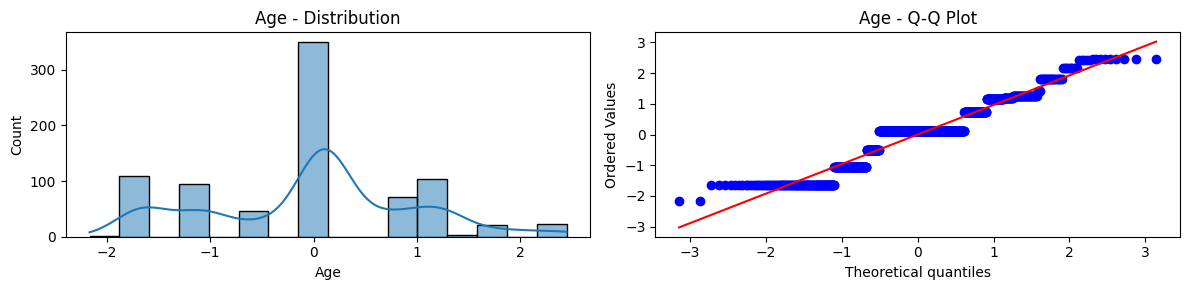

In [60]:
x_train_transformed = pd.DataFrame(x_train_transformed, columns=x_train.columns)
for col in x_train_transformed.columns:
    plt.figure(figsize=(12, 3))

    # Histogram + KDE
    plt.subplot(1, 2, 1)
    sns.histplot(x_train_transformed[col], kde=True)
    plt.title(f'{col} - Distribution')

    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(x_train_transformed[col], dist='norm', plot=plt)
    plt.title(f'{col} - Q-Q Plot')

    plt.tight_layout()
    plt.show()
